### 지도학습
 * Regression
   * 선형회귀
     * feature가 하나 : 단순선형회귀
     * feature가 여러개 : 다중선형회귀
        * y = w1*x1 + w2*x2 + b
         * w1, w2, b
        * MSE가 최소가 되도록 결정된다.
 * Classification

In [1]:
import mglearn

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Ridge  #릿지회귀
import pandas as pd

In [3]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
boston = load_boston()

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 단순선형 회귀, 다중 선형 회귀

In [17]:
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [18]:
# sel = ['INDUS','RM']
sel = df_boston.columns[ : -1]
X = df_boston[sel]       # 입력
y = df_boston['target']  # 출력

In [19]:
### 데이터 나누기

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
# pred = model.predict(X_test)

LinearRegression()

In [21]:
# y = -0.6341 * INDUS + 8.16489603 * RM + 29.9596
model.coef_, model.intercept_

(array([-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,  2.77350326e+00,
        -1.62388292e+01,  4.36875476e+00, -9.24808158e-03, -1.40086668e+00,
         2.57761243e-01, -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]),
 29.836420163838774)

In [ ]:
pred = model.predict(X_test)

In [23]:
# 학습 데이터 셋의 결정계수
print('학습 데이터 셋 : ', model.score(X_train, y_train))
print('테스트 데이터 셋 : ', model.score(X_test, y_test))

학습 데이터 셋 :  0.748087259862344
테스트 데이터 셋 :  0.6844267283527077


<AxesSubplot:>

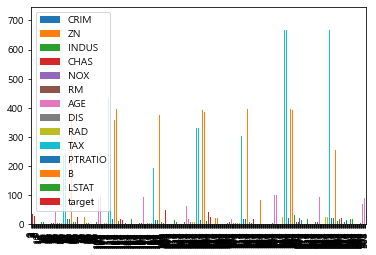

In [24]:
df_boston.plot(kind='bar')

In [28]:
X.columns, X.shape

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'),
 (506, 13))

In [26]:
ex_X = PolynomialFeatures(degree=2, 
                          include_bias=False).fit_transform(X)  # 데이터 feature 추가 생성
ex_X.shape

(506, 104)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
Ir = LinearRegression().fit(X_train, y_train)

print("훈련 데이터 세트 점수 : {:.2f}".format(Ir.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(Ir.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78


### 릿지(Ridge)-L1, 라쏘(Lasso)-L2
 * y = w1 * x1 + w2 + x2 + w3 * x3 + .. + b
  * 라쏘의 경우
  * * y = w1 * x1 + 0 + x2 + w3*x3 + 0* x4 +.. + b
    
  * 릿지의 경우
  * * y = w1 * x1 + w2 +x2 + w3*x3 + w4 * x4 +.. + b
    
### 라쏘와 릿지의 공통점
 * 가중치를 최대한 0에 가깝조록 규제를 가한다.
    
### 라쏘(L1)와 릿지(L2)의 차이점
 * 라쏘는 어떤 가중치는 실제로 0이 되어서 변수가 사라진다.
 * 릿지는 모든 가중치가 실제로 0에 가깝게 가지만 0이 되지는 않는다.

In [32]:
import numpy as np

In [34]:
# sel = ['INDUS', 'RM']
sel = df_boston.columns[ : -1]
X =df_boston[sel]
y = df_boston['target']

In [35]:
print( X.shape )  # 특징의 개수
X.describe()      # 특징의 요약값

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [36]:
normalize_X = MinMaxScaler().fit_transform(X)  # 입력 데이터 정규화
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(normalize_X)

print('정규화, 추가 생성 : ',ex_X.shape, y.shape)
print(np.min(ex_X), np.max(ex_X))

정규화, 추가 생성 :  (506, 104) (506,)
0.0 1.0


In [38]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)
Ir = LinearRegression().fit(X_train, y_train)

print('훈련 데이터 세트 점수 : {:.2f}'.format(Ir.score(X_train, y_train)))
print('테스트 데이터 세트 점수 : {:.2f}'.format(Ir.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78


In [39]:
from sklearn.linear_model import Lasso, Ridge # Lasso: L1, Ridge: L2

lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print('훈련 데이터 세트 점수 : {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 데이터 세트 점수 : {:.2f}'.format(lasso.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.89
테스트 데이터 세트 점수 : 0.80


C:\Users\ahw48\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364154819, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [48]:
from sklearn.linear_model import Lasso, Ridge # Lasso: L1, Ridge: L2

lasso = Ridge(alpha=0.01).fit(X_train, y_train)
print('훈련 데이터 세트 점수 : {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 데이터 세트 점수 : {:.2f}'.format(lasso.score(X_test, y_test)))

훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.81


In [42]:
sel = [10, 5, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]
for var in sel:
    ridge = Ridge(alpha=var).fit(X_train, y_train)
    print('학습용 데이터 점수 : {:.2f}'.format(ridge.score(X_train, y_train)))
    print('테스트 데이터 점수 : {:.2f}'.format(ridge.score(X_test, y_test)))
    print()   

학습용 데이터 점수 : 0.77
테스트 데이터 점수 : 0.73

학습용 데이터 점수 : 0.80
테스트 데이터 점수 : 0.76

학습용 데이터 점수 : 0.87
테스트 데이터 점수 : 0.81

학습용 데이터 점수 : 0.89
테스트 데이터 점수 : 0.82

학습용 데이터 점수 : 0.92
테스트 데이터 점수 : 0.82

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.81

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.81

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.79



In [49]:
sel = [10, 5, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]
for var in sel:
    lasso = Lasso(alpha=var).fit(X_train, y_train)
    print('학습용 데이터 점수 : {:.2f}'.format(lasso.score(X_train, y_train)))
    print('테스트 데이터 점수 : {:.2f}'.format(lasso.score(X_test, y_test)))
    print()   

학습용 데이터 점수 : 0.00
테스트 데이터 점수 : -0.03

학습용 데이터 점수 : 0.00
테스트 데이터 점수 : -0.03

학습용 데이터 점수 : 0.27
테스트 데이터 점수 : 0.26

학습용 데이터 점수 : 0.61
테스트 데이터 점수 : 0.58

학습용 데이터 점수 : 0.75
테스트 데이터 점수 : 0.70

학습용 데이터 점수 : 0.89
테스트 데이터 점수 : 0.80

학습용 데이터 점수 : 0.93
테스트 데이터 점수 : 0.81

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.78



C:\Users\ahw48\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364154819, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\ahw48\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864.379655025055, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(
C:\Users\ahw48\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471466, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


학습 :  0.9448313975211593
학습 :  0.7758378393351684
학습 :  0.8700969775259912
학습 :  0.8145421818415551


(-2000.0, 2000.0)

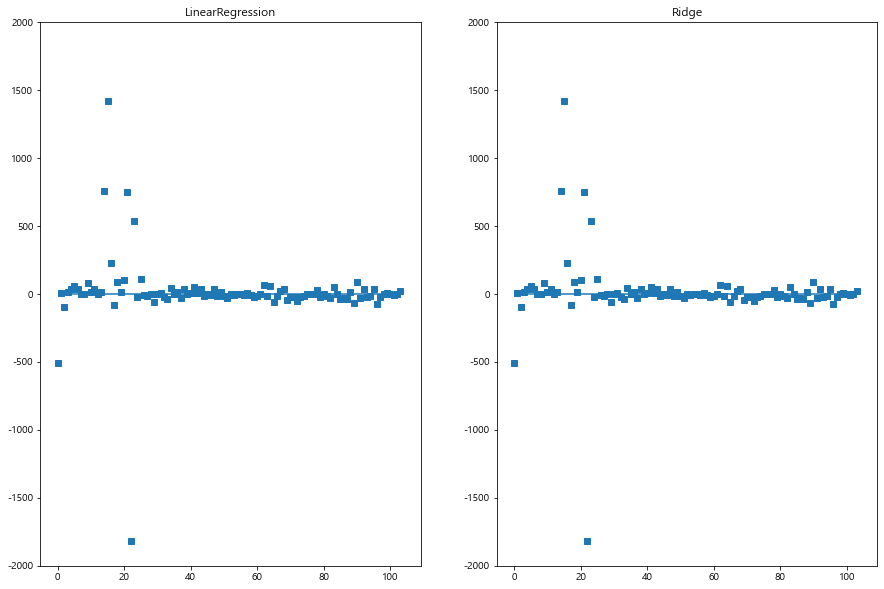

In [54]:
# Ridge - L2규제, 0에 가깝게 만들지만, 0이 되는 친구는 없다.
lr = LinearRegression().fit(X_train, y_train)
print("학습 : ", lr.score(X_train, y_train) )
print("학습 : ", lr.score(X_test, y_test) )
# Ridge - L2규제, 0에 가깝게 만들지만, 0이 되는 친구는 없다.
ridge = Ridge().fit(X_train, y_train)
print("학습 : ", ridge.score(X_train, y_train) )
print("학습 : ", ridge.score(X_test, y_test) )
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.hlines(0,0, len(lr.coef_))
plt.plot(lr.coef_, 's', label="LinearRegression")
plt.title('LinearRegression')
plt.ylim(-2000,2000)
plt.subplot(1, 2, 2)
plt.hlines(0,0, len(lr.coef_))
plt.plot(lr.coef_, 's', label="Ridge")
plt.title('Ridge')
plt.ylim(-2000,2000)

학습 :  0.9448313975211593
학습 :  0.7758378393351684
feature의 개수 :  104
학습 :  0.9357645261988794
학습 :  0.8144760713008679
feature의 개수 :  102
학습 :  0.937433072538205
학습 :  0.7764741268470523


C:\Users\ahw48\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471466, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


(-2000.0, 2000.0)

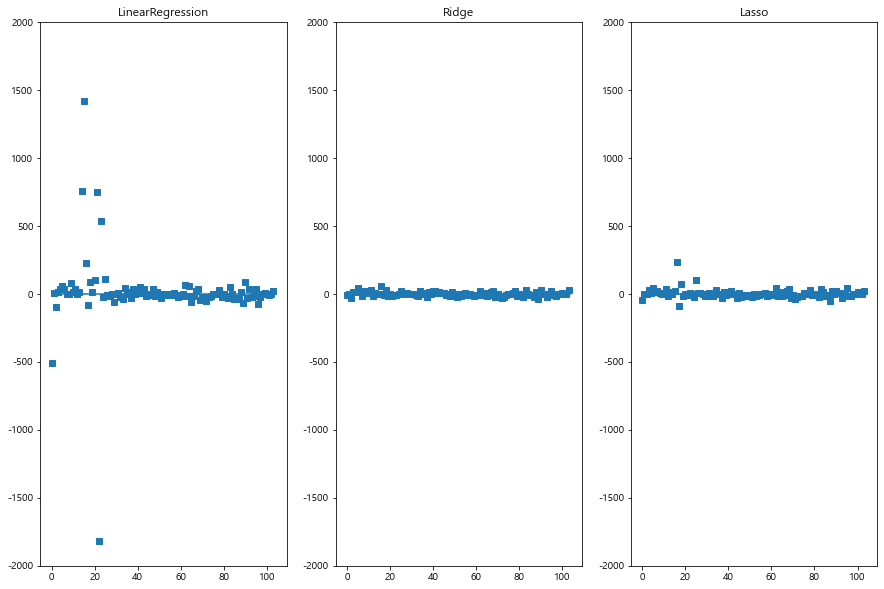

In [59]:
# Ridge - L2규제, 0에 가깝게 만들지만, 0이 되는 친구는 없다.
lr = LinearRegression().fit(X_train, y_train)
print("학습 : ", lr.score(X_train, y_train) )
print("학습 : ", lr.score(X_test, y_test) )

# Ridge - L2규제, 0에 가깝게 만들지만, 0이 되는 친구는 없다.
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print('feature의 개수 : ', sum(ridge.coef_!=0))
print("학습 : ", ridge.score(X_train, y_train) )
print("학습 : ", ridge.score(X_test, y_test) )

# Lasso - L1규제, 0에 가깝게 만들지만, 0이 되는 친구는 있다.
lasso = Lasso(alpha=0.0001).fit(X_train, y_train)
print('feature의 개수 : ', sum(lasso.coef_!=0))
print("학습 : ", lasso.score(X_train, y_train) )
print("학습 : ", lasso.score(X_test, y_test) )

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.hlines(0,0, len(lr.coef_))
plt.plot(lr.coef_, 's', label="LinearRegression")
plt.title('LinearRegression')
plt.ylim(-2000,2000)

plt.subplot(1, 3, 2)
plt.hlines(0,0, len(ridge.coef_))
plt.plot(ridge.coef_, 's', label="Ridge")
plt.title('Ridge')
plt.ylim(-2000,2000)

plt.subplot(1, 3, 3)
plt.hlines(0,0, len(lasso.coef_))
plt.plot(lasso.coef_, 's', label="Lasso")
plt.title('Lasso')
plt.ylim(-2000,2000)


In [ ]:
### 선형모델
 * LinearRegression
     * MSE를 최소화하는 w, b값을 찾는다.
 * feature 1개
     * 직선
 * feature 2개
     * 평면
 * 회귀 모델에서 평가지표
    * MSE, MAE, RMSE, RMLSE
       * MAE : |실제값 - 예측값| 절대값을 전부 더해주고, 개수를 나누어진다.
       * MSE : (실제값 - 예측값)**2 전부 더해서 개수로 나누어준다.
       * RMSE : MSE ** 0.5
       * RMLSE : [(log(실제값+1)-log(예측값+1))**2 전부 더하고]/개수 ->